# K-means Clustering

###  AUTHOR: IKEH CHIAMAKA

In this exercise, I implemented the K-means algorithm and use it for image compression.

* I started with a sample dataset that will help me gain an intuition of how the K-means algorithm works.

* After that, I useD the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.



In [10]:
!pip install utils
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=57d5af8b9ec0899e9e76355cb5ddb4f00a919f2f320612384fec06149aed7c57
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together.

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”.


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then
     * Refines this guess by
         * Repeatedly assigning examples to their closest centroids, and then
         * Recomputing the centroids based on the assignments.
         



<a name="1.1"></a>
### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids.

<a name="ex01"></a>
### Exercise 1

 Task is to complete the code in `find_closest_centroids`.


In [11]:
# find_closest_centroids

def find_closest_centroids(X, centroids):

    # Set K
    K = centroids.shape[0]

    #  return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)


    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

Now let's check your implementation using an example dataset

In [23]:
# Load an example dataset

from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

def load_data():
    """Loads the data from 'kmeans/data.txt' in Google Drive.

    Returns:
        numpy.ndarray: The dataset.
    """
    file_path = '/kmeans.csv'  # Replace 'kmeans' with the correct folder name if needed
    data = np.loadtxt(file_path,  delimiter=',') # Adjust delimiter if necessary
    return data

# Load an example dataset
X = load_data()
X
#X = load_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[ 0.        ,  1.        ],
       [ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [ ]:
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [30]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST

# Install the required testing utilities (assuming they are in a package named 'dlai-tools')
!pip install dlai-tools

import sys
import os
from dlai_tools.testing_utils import single_test, multiple_test
# Assuming public_tests.py is in the same directory as the notebook
# Get the absolute path of the current notebook
#notebook_path = os.path.abspath("__file__")  # Using __file__ for the notebook's path
# Get the parent directory
#parent_path = os.path.dirname(notebook_path)
# Add the 'public_tests' directory to the system path
#public_tests_path = os.path.join(parent_path, 'public_tests')
#sys.path.append(public_tests_path)
# Or if public_tests.py is in the current directory:
# sys.path.append(os.getcwd())

#from public_tests import *

# Assuming find_closest_centroids_test is a function in public_tests,
# you may need to adapt it to the new testing utils:
def find_closest_centroids_test(target):
  # Implement the test logic using single_test or multiple_test
  # from dlai_tools.testing_utils
  pass # Replace with your actual test implementation

find_closest_centroids_test(find_closest_centroids)

First three elements in idx are: [0 0 2]


<a name="1.2"></a>
### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


<a name="ex02"></a>
### Exercise 2

Please complete the `compute_centroids` below to recompute the value for each centroid



In [31]:
#  compute_centroids

def compute_centroids(X, idx, K):


    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))


    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)




    return centroids

Now check your implementation by running the cell below

In [33]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST

from dlai_tools.testing_utils import single_test, multiple_test

def compute_centroids_test(target):
    # Replace with actual test logic using single_test or multiple_test
    pass

compute_centroids_test(compute_centroids)

The centroids are: [[2.41565371 3.14668499]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


<a name="2"></a>
## 2 - K-means on a sample dataset

After  completing the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to run the
K-means algorithm on a toy 2D dataset to help you understand how
K-means works.



In [34]:


def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):


    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [38]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i) # Now, plot_progress_kMeans should be accessible.
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

<a name="3"></a>
## 3 - Random initialization

.

In this part of the exercise, is to understand how the function `kMeans_init_centroids` is implemented.
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`).
* Then, it selects the first $K$ examples based on the random permutation of the indices.
* This allows the examples to be selected at random without the risk of selecting the same example twice.


In [39]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):


    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

 run K-Means again but this time with random initial centroids. Run the cell below several times and observe how different clusters are created based on the initial points chosen.

In [42]:
from IPython import get_ipython
from IPython.display import display
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
#centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i) # Now, plot_progress_kMeans should be accessible.
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

<a name="4"></a>
## 4 - Image compression with K-means

In this exercise, I applied K-means to image compression.


In [60]:
# Load an image of a bird
original_img = plt.imread('/img.jpeg')


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Visualize image**

You can visualize the image that was just loaded using the code below.

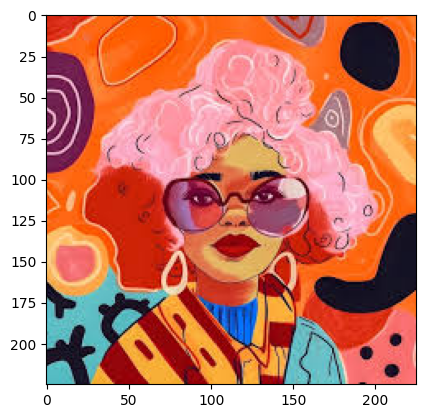

In [62]:
# Visualizing the image
plt.imshow(original_img)

**Check the dimension of the variable**

print out the shape of your variable to get more familiar with the data.

In [63]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (225, 225, 3)


In [64]:


# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [65]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [66]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (50625,)
Closest centroid for the first five elements: [12 12 12 12 12]


The code below will plot all the colors found in the original image. As mentioned earlier, the color of each pixel is represented by RGB values so the plot should have 3 axes -- R, G, and B. notice a lot of dots below representing thousands of colors in the original image. The red markers represent the centroids after running K-means. These will be the 16 colors that you will use to compress the image.

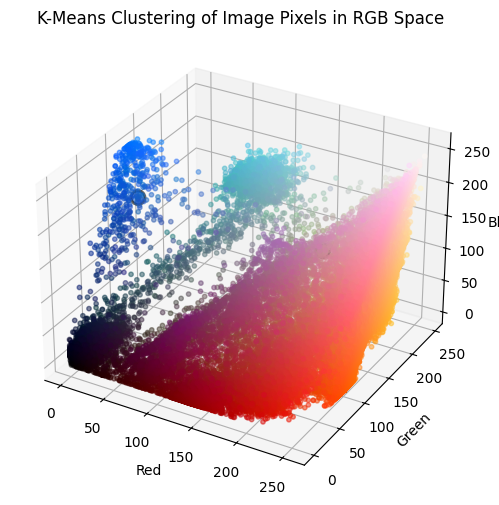

In [68]:
# Plot the colors of the image and mark the centroids


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_kMeans_RGB(X, centroids, idx, K):
    """Plots the data points and centroids in 3D RGB space."""

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X / 255.0, s=10, alpha=0.5)

    # Plot the centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               c=centroids / 255.0, s=100, marker='o', linewidths=2,
               edgecolors='k')

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('K-Means Clustering of Image Pixels in RGB Space')

    plt.show()


# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

You can visualize the colors at each of the red markers (i.e. the centroids) above with the function below. You will only see these colors when you generate the new image in the next section. The number below each color is its index and these are the numbers you see in the `idx` array.

In [69]:

import matplotlib.pyplot as plt
import numpy as np

def show_centroid_colors(centroids):
    """
    Displays the colors represented by the centroids.

    Args:
        centroids (numpy.ndarray): The centroids representing the colors.
    """
    num_centroids = centroids.shape[0]

    # Create a figure and axes
    fig, ax = plt.subplots(1, num_centroids, figsize=(num_centroids, 1))

    # Iterate through the centroids and display the corresponding colors
    for i in range(num_centroids):
        # Create a patch with the centroid color
        color_patch = np.ones((1, 1, 3)) * centroids[i] / 255.0

        # Display the color patch on the axes
        ax[i].imshow(color_patch)
        ax[i].axis('off')  # Turn off axis labels
        ax[i].set_title(str(i))  # Set the title as the centroid index

    plt.show() # Show the plot

<a name="4.3"></a>
### 4.3 Compress the image


In [70]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

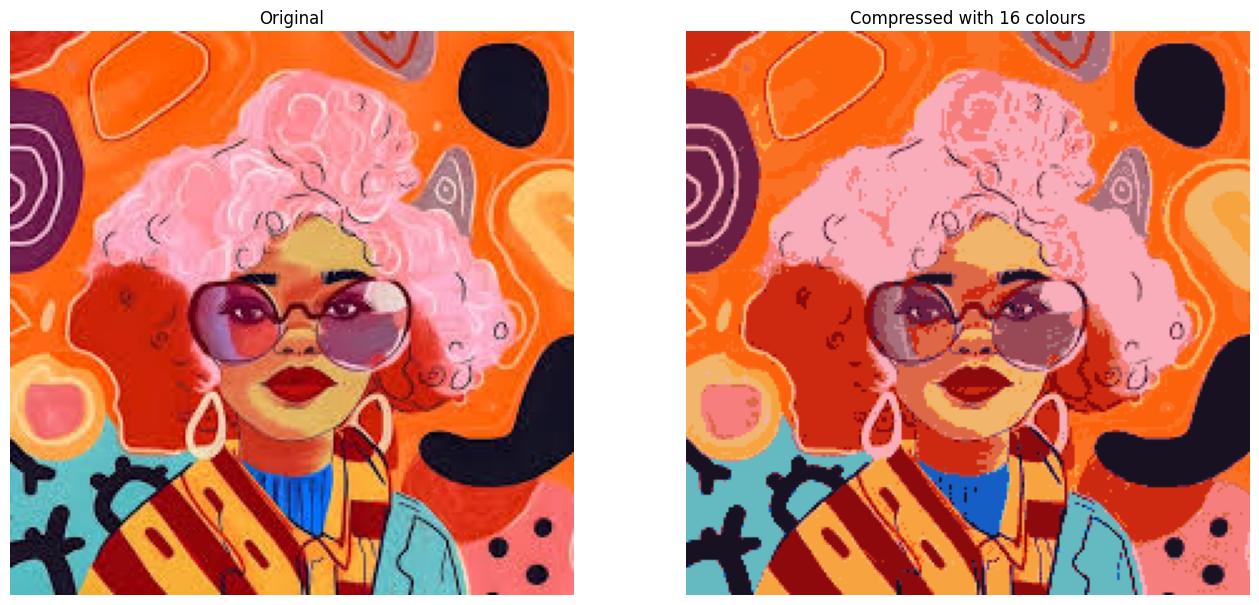

In [72]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

# Clip pixel values to be in the valid range
X_recovered = np.clip(X_recovered, 0, 255)

# Ensure data type is uint8
X_recovered = X_recovered.astype(np.uint8)

# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

plt.show()